In [1]:
print("hello")

hello


In [2]:
from dotenv import load_dotenv
import os

In [3]:
load_dotenv()

True

In [4]:
groq_api_key=os.getenv("groq_api_key")

In [5]:
os.environ["groq_api_key"]=groq_api_key

In [6]:
model="llama-3.1-8b-instant"

In [7]:
from langchain_groq import ChatGroq

/Users/fardeenkhan/coding/LANGGRAPH/lg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
llm=ChatGroq(model=model ,api_key=groq_api_key)

In [9]:
llm.invoke("who is jefri epstein?")

AIMessage(content="Jeffrey Epstein (1953-2019) was an American financier, philanthropist, and convicted sex offender. He was known for his wealth and his connections to influential people in politics, finance, and entertainment.\n\nEpstein's early life and career were marked by controversy. He was born in Brooklyn, New York, to a middle-class family. He began his career as a teacher at the Dalton School in New York City, but he later dropped out to pursue a career in finance. He worked as a trader at Bear Stearns and later founded his own consulting firm, which focused on providing financial advice to wealthy clients.\n\nIn the 1980s and 1990s, Epstein became known for his relationships with powerful people, including billionaires, politicians, and celebrities. He was a regular visitor to the homes of Prince Andrew, Duke of York, and Donald Trump, and he was also friends with Bill Clinton and other prominent figures.\n\nHowever, Epstein's personal life was marred by allegations of sex 

In [10]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from  langchain_huggingface import HuggingFaceEmbeddings
import os
from typing import List
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage,AIMessage
import operator
from typing import List
from langgraph.graph.message import add_messages
from  langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode


from langchain_core.tools import tool

In [11]:
from pydantic import BaseModel, Field

In [12]:
def call_model(state:MessagesState):
    question=state["messages"]
    
    response=llm.invoke(question)
    
    return {"messages":[response]}

In [13]:
state={"messages":["hi hello how are you?"]}

In [14]:
call_model(state)

{'messages': [AIMessage(content="Hello. I'm functioning properly, thanks for asking.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 41, 'total_tokens': 53, 'completion_time': 0.016966053, 'completion_tokens_details': None, 'prompt_time': 0.001976611, 'prompt_tokens_details': None, 'queue_time': 0.045117839, 'total_time': 0.018942664}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-f5f2-78f0-915c-9d6e760b4b8e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 12, 'total_tokens': 53})]}

In [15]:
workflow=StateGraph(MessagesState)

In [16]:
workflow.add_node("my_bot",call_model)

In [17]:
workflow.add_edge(START,"my_bot")

In [18]:
workflow.add_edge("my_bot",END)

In [19]:
app=workflow.compile()

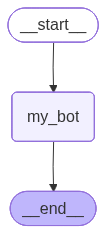

In [20]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
input={"messages":["hi,how are you"]}

In [22]:
app.invoke(input)

{'messages': [HumanMessage(content='hi,how are you', additional_kwargs={}, response_metadata={}, id='9a8c14c6-70c2-450e-b027-edc41556365a'),
  AIMessage(content="I'm just a language model, I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. It's nice to chat with you, how can I help?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 40, 'total_tokens': 91, 'completion_time': 0.075757806, 'completion_tokens_details': None, 'prompt_time': 0.001807499, 'prompt_tokens_details': None, 'queue_time': 0.047515137, 'total_time': 0.077565305}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-f6b0-7d53-bbd3-600afe7bcda3-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 40, 'output_token

In [23]:
for output in app.stream(input):
    for key ,value in  output.items():
        print(f"output from {key} Node")
        print("________________________")
        print(value)
        print("\n")

output from my_bot Node
________________________
{'messages': [AIMessage(content="I'm doing well, thank you for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 40, 'total_tokens': 96, 'completion_time': 0.060256915, 'completion_tokens_details': None, 'prompt_time': 0.001883585, 'prompt_tokens_details': None, 'queue_time': 0.046472541, 'total_time': 0.0621405}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-f757-7f83-8f89-fd44dea63ffc-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 40, 'output_tokens': 56, 'total_tokens': 96})]}




In [24]:
@tool
def search(query:str):
    """this is my custom tool to search wheather"""
    if "dehli" in query.lower():
        return "the temp is 45 degree and sunny"
    
    return  "the temperature is 25 degree and cloudy"

In [25]:
search.invoke("what is the temperature in kashmir?")

'the temperature is 25 degree and cloudy'

In [26]:
search.invoke("what is the tempeartaure in dehli?")

'the temp is 45 degree and sunny'

In [27]:
tools=[search]

In [28]:
llm_with_tool=llm.bind_tools(tools)

In [29]:
response=llm_with_tool.invoke("what is the weather in dehli?")

In [30]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nrr5m48vj', 'function': {'arguments': '{"query":"dehli weather today"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 225, 'total_tokens': 242, 'completion_time': 0.029515891, 'completion_tokens_details': None, 'prompt_time': 0.017668661, 'prompt_tokens_details': None, 'queue_time': 0.061315658, 'total_time': 0.047184552}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-f806-7751-8560-fae31083c039-0', tool_calls=[{'name': 'search', 'args': {'query': 'dehli weather today'}, 'id': 'nrr5m48vj', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 225, 'output_tokens': 17, 'total_tokens': 242})

In [31]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'dehli weather today'},
  'id': 'nrr5m48vj',
  'type': 'tool_call'}]

In [32]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [33]:
input={"messages":["what is a weather in delhi?"]}

In [34]:
response=call_model(input)

In [35]:
response["messages"][-1].content

''

In [36]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'delhi weather'},
  'id': 's78w8ebg2',
  'type': 'tool_call'}]

In [37]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END


In [38]:
tools

[StructuredTool(name='search', description='this is my custom tool to search wheather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x1285ac8b0>)]

In [39]:
tool_node=ToolNode(tools)

In [40]:
workflow2=StateGraph(MessagesState)


In [41]:
workflow2.add_node("llm_with_tool",call_model)
workflow2.add_node("my_tools",tool_node)

In [42]:
workflow2.add_edge(START,"llm_with_tool")
workflow2.add_conditional_edges("llm_with_tool",
                                router_function,
                                {"tools":"my_tools",
                                 END:END})

In [43]:
app2=workflow2.compile()

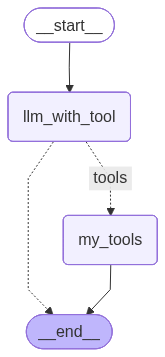

In [44]:
from IPython.display import Image,display
display(Image(app2.get_graph().draw_mermaid_png()))

In [45]:
app2.invoke({"messages":["what is a weather in delhi ?"]})

{'messages': [HumanMessage(content='what is a weather in delhi ?', additional_kwargs={}, response_metadata={}, id='866563e5-f643-4599-878e-36e04baf1dc1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ejgm4gadz', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.027562573, 'completion_tokens_details': None, 'prompt_time': 0.012693439, 'prompt_tokens_details': None, 'queue_time': 0.047130168, 'total_time': 0.040256012}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-f982-7960-81c3-f4f459a0ef4a-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id': 'ejgm4gadz', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'in

In [46]:
app2.invoke({"messages":["what is a weather in mumbai?"]})

{'messages': [HumanMessage(content='what is a weather in mumbai?', additional_kwargs={}, response_metadata={}, id='f4712143-5063-46a0-a09b-bd8146552612'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yensjjemh', 'function': {'arguments': '{"query":"mumbai weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.025080382, 'completion_tokens_details': None, 'prompt_time': 0.012791161, 'prompt_tokens_details': None, 'queue_time': 0.045286316, 'total_time': 0.037871543}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-fa02-7981-a2e8-c71349d5078e-0', tool_calls=[{'name': 'search', 'args': {'query': 'mumbai weather'}, 'id': 'yensjjemh', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'

In [47]:
response=app2.invoke({"messages":["hi  how are you"]})

In [48]:
response["messages"][-1].content

"I'm functioning properly, thanks for asking. What can I assist you with today?"

In [49]:
workflow2.add_edge("my_tools","llm_with_tool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [50]:
app3=workflow2.compile()

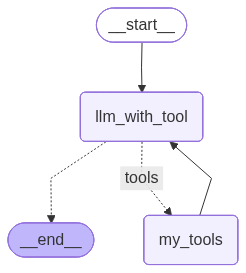

In [51]:
from IPython.display import Image,display
display(Image(app3.get_graph().draw_mermaid_png()))

In [52]:
for output in app3.stream({"messages":["what is the weather in new dehli"]}):
    for key,value in output.items():
        print(f"here is the output from {key}")
        print("__________________")
        print(value)
        print("\n")

here is the output from llm_with_tool
__________________
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h8rvbh5vf', 'function': {'arguments': '{"query":"new dehli weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 225, 'total_tokens': 242, 'completion_time': 0.027607328, 'completion_tokens_details': None, 'prompt_time': 0.01291485, 'prompt_tokens_details': None, 'queue_time': 0.04652859, 'total_time': 0.040522178}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c3380-fb58-76f1-a43d-7057cb322e6b-0', tool_calls=[{'name': 'search', 'args': {'query': 'new dehli weather'}, 'id': 'h8rvbh5vf', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 225, 'output_tokens': 17, 'total_tokens': 242})]}


here is the out

In [53]:
from langgraph.checkpoint.memory import MemorySaver

In [54]:
memory=MemorySaver()

In [55]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llm_with_tool",call_model)

workflow3.add_node("my_tools",tool_node)

workflow3.add_edge(START,"llm_with_tool")

workflow3.add_conditional_edges("llm_with_tool",
                                router_function,
                                {"tools":"my_tools",
                                 END:END})

workflow3.add_edge("my_tools","llm_with_tool")

In [56]:
app4=workflow3.compile(checkpointer=memory)

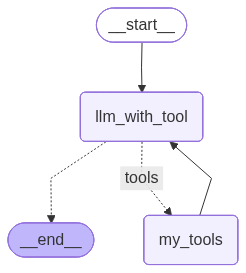

In [57]:
from IPython.display import Image,display
display(Image(app4.get_graph().draw_mermaid_png()))

In [58]:
config={"configurable":{"thread_id":"1"}}

In [65]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [66]:
for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (7efxn348p)
 Call ID: 7efxn348p
  Args:
    query: New Delhi weather
================================= Tool Message =================================
Name: search

the temperature is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (3gn4kfa1w)
 Call ID: 3gn4kfa1w
  Args:
    query: New Delhi temperature and weather today
================================= Tool Message =================================
Name: search

the temperature is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (jrm7h0grp)
 Call ID: jrm7h0grp
  Args:
    query: New Delhi weather forecast for the next 7 days
================================= Tool Message =====

In [74]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [75]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (b8wx1jv85)
 Call ID: b8wx1jv85
  Args:
    query: Indore weather
================================= Tool Message =================================
Name: search

the temperature is 25 degree and cloudy
================================== Ai Message ==================================

The weather in Indore is 25 degrees and cloudy.


In [76]:
memory.get(config)

{'v': 4,
 'ts': '2026-02-06T15:16:53.945568+00:00',
 'id': '1f1036ed-e80a-6a5a-8019-e829a8fc27f5',
 'channel_versions': {'__start__': '00000000000000000000000000000024.0.6972237808576419',
  'messages': '00000000000000000000000000000027.0.553952428192877',
  'branch:to:llm_with_tool': '00000000000000000000000000000027.0.553952428192877',
  'branch:to:my_tools': '00000000000000000000000000000026.0.13688749223407393'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000023.0.26707237859911837'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000026.0.13688749223407393'},
  'my_tools': {'branch:to:my_tools': '00000000000000000000000000000025.0.050490216629986095'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='4ec81683-44df-4b52-82b0-ff41da4880fa'),
   AIMessage(content='', additional_kwargs={'

In [77]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [78]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================
Tool Calls:
  search (spskqk6n4)
 Call ID: spskqk6n4
  Args:
    query: city with temperature 25 degree
  search (td7rtv27c)
 Call ID: td7rtv27c
  Args:
    query: Indore temperature
================================= Tool Message =================================
Name: search

the temperature is 25 degree and cloudy
================================== Ai Message ==================================

The temperature of 25 degree was found in Indore.


In [72]:
memory.get(config)

{'v': 4,
 'ts': '2026-02-06T15:13:38.679000+00:00',
 'id': '1f1036e6-a1d5-68d4-8014-20e5c81ee421',
 'channel_versions': {'__start__': '00000000000000000000000000000019.0.2478998092971203',
  'messages': '00000000000000000000000000000022.0.3557843026924593',
  'branch:to:llm_with_tool': '00000000000000000000000000000022.0.3557843026924593',
  'branch:to:my_tools': '00000000000000000000000000000021.0.5109952374500887'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000018.0.0352287545373382'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000021.0.5109952374500887'},
  'my_tools': {'branch:to:my_tools': '00000000000000000000000000000020.0.19061596095974287'}},
 'updated_channels': ['messages'],
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='4ec81683-44df-4b52-82b0-ff41da4880fa'),
   AIMessage(content='', additional_kwargs={'to